In [5]:
import pickle
import pandas as pd 
import numpy as np
from msresist.pre_processing import filter_NaNpeptides
from msresist.figures.figureM7 import FormatXYmatrices
from msresist.figures.figureM5 import plotPeptidesByFeature
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
with open('msresist/data/pickled_models/binomial/CPTACmodel_BINOMIAL_CL24_W15_TMT2', 'rb') as p:
    model = pickle.load(p)[0]

In [3]:
X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]
X = filter_NaNpeptides(X, tmt=2)

centers = pd.DataFrame(model.transform())
centers.columns = np.arange(model.ncl) + 1
centers["Patient_ID"] = X.columns[4:]
centers = centers.loc[~centers["Patient_ID"].str.endswith(".N"), :].sort_values(by="Patient_ID").set_index("Patient_ID")
_, y = FormatXYmatrices(centers.copy())
y.index = y.index.rename("Sample.ID")
y = y.reset_index().sort_values(by="Sample.ID")

X["cluster"] = model.labels()
c6 = X[X["cluster"] == 6].drop("cluster", axis=1)
c6 = c6.loc[:, ~c6.columns.str.endswith(".N")]

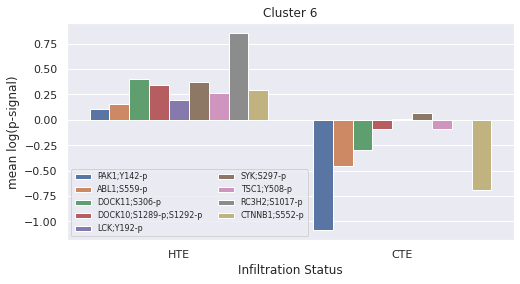

In [6]:
_, ax = plt.subplots(1, 1, figsize=(8, 4))

#B cell homeo PAK-DOCK10; T cell diff the rest 
d = {"PAK1":"Y142-p", "ABL1": "S559-p", "DOCK11":"S306-p", "DOCK10": "S1289-p;S1292-p", "LCK":"Y192-p", "SYK":"S297-p", "TSC1":"Y508-p", "RC3H2": "S1017-p", "CTNNB1":"S552-p"}
plotPeptidesByFeature(c6, y, d, ["Infiltration Status", "HTE", "CTE"], ax, title="Cluster 6")
h,l = ax.get_legend_handles_labels()
ax.legend_.remove()
ax.legend(h,l, ncol=2, prop={'size':8})

In [7]:
c17 = X[X["cluster"] == 17].drop("cluster", axis=1)
c17 = c17.loc[:, ~c17.columns.str.endswith(".N")]

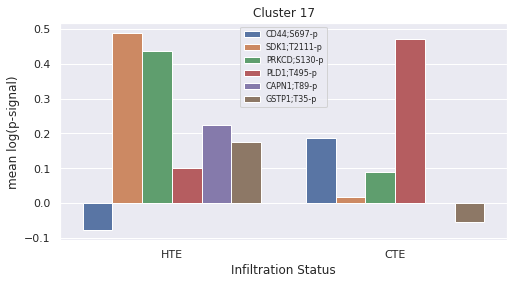

In [8]:
d = {"CD44":"S697-p", "SDK1":"T2111-p", "PRKCD":"S130-p", "PLD1": "T495-p", "CAPN1":"T89-p", "GSTP1":"T35-p"}

_, ax = plt.subplots(1, 1, figsize=(8, 4))
plotPeptidesByFeature(c17, y, d, ["Infiltration Status", "HTE", "CTE"], ax, title="Cluster 17")

In [52]:
c20 = X[X["cluster"] == 20].drop("cluster", axis=1)
c20 = c20.loc[:, ~c20.columns.str.endswith(".N")]

In [131]:
c20[c20["Gene"].str.contains("RAF1")]

,Sequence,Protein,Gene,Position,C3N.01799,C3L.01890,C3N.00572,C3N.02423,C3N.02729,C3L.00263,C3N.01410,C3N.00578,C3N.02587,C3L.00893,C3N.01488,...,C3L.02508,C3N.00560,C3L.00604,C3N.00199,C3N.00579,C3N.02582,C3N.02379.1,C3L.02350,C3N.00738,C3N.00959,C3N.02003,C3N.00175,C3N.01823,C3L.02549,C3L.02365
35180,SPNNLsPTGWS,NP_001341618.1,RAF1,S301-p,NaN,NaN,NaN,NaN,0.20455,0.093031,-1.046443,0.171914,0.596738,0.418794,0.774087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


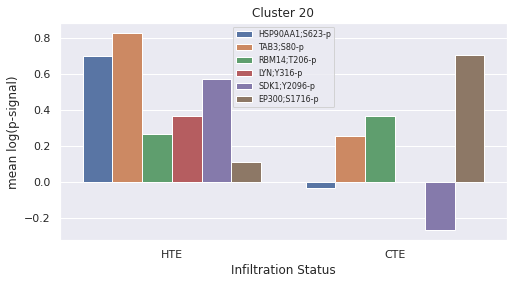

In [133]:
d = {"HSP90AA1":"S623-p", "TAB3":"S80-p", "RBM14":"T206-p", "LYN":"Y316-p", "SDK1":"Y2096-p", "EP300":"S1716-p"}

_, ax = plt.subplots(1, 1, figsize=(8, 4))
plotPeptidesByFeature(c20, y, d, ["Infiltration Status", "HTE", "CTE"], ax, title="Cluster 20")